# Friends Analysis

In [ ]:
from friends import bar_added, bar_added_gender, bar_name
from friends import friends_cumsum_by_gender, gender_ratio, week_processing

import pandas as pd

In [2]:
PATH = '../data/processed/'

friends = pd.read_csv(f'{PATH}friends.csv')
friends.date = pd.to_datetime(friends.date)
friends = friends.set_index('date')\
            .sort_index()

friends.head()

,fname,male,female
date,,,
2009-06-02 18:04:21,harold,True,False
2009-06-02 18:10:50,marie,False,True
2009-06-02 18:19:26,sylvain,True,False
2009-06-02 18:21:42,anne-sophie,False,True
2009-06-02 18:29:05,aurelie,False,True


## Male / Female proportions

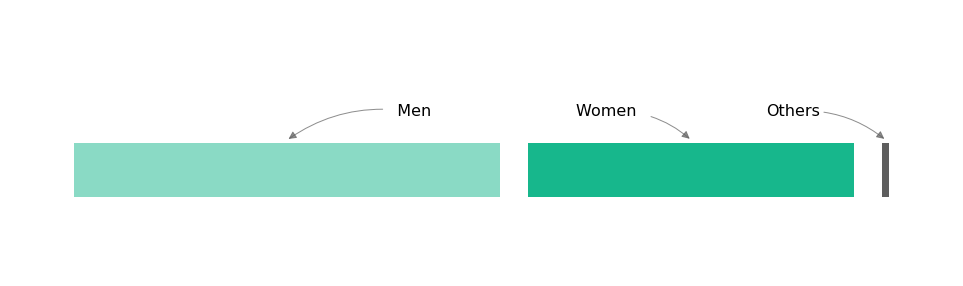

In [3]:
men = friends.male.value_counts()[True]
women = friends.female.value_counts()[True]

gender_ratio(men, women, len(friends) - men - women)

## Evolution of the connection through time

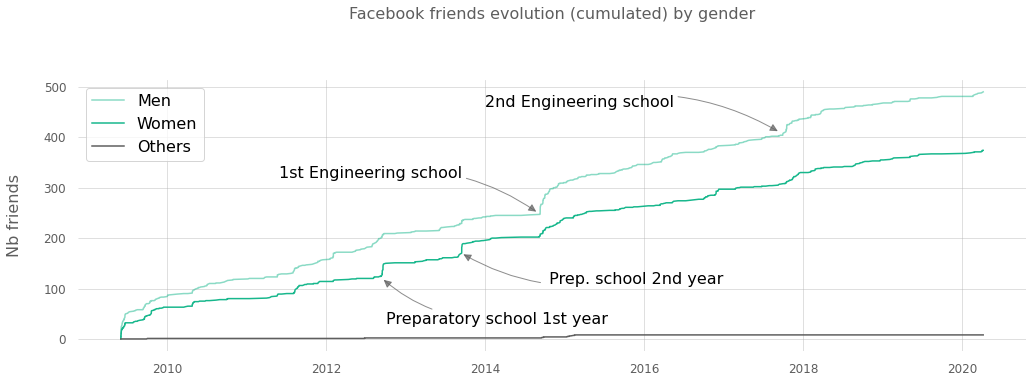

In [4]:
friends_cumsum_by_gender(friends)

## First names distributions

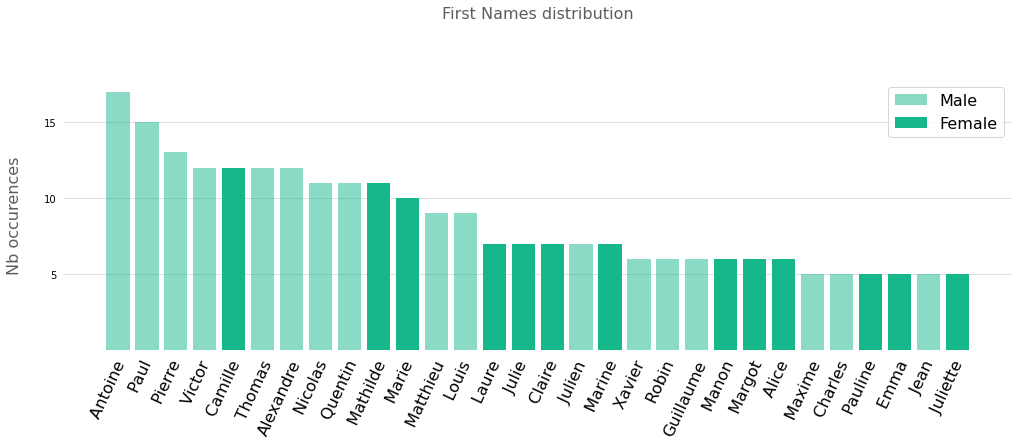

In [5]:
bar_name(friends)

## Connections Analysis by day of week

In [6]:
df = friends.assign(added=1)
full = week_processing(df[["added"]])

### All genders

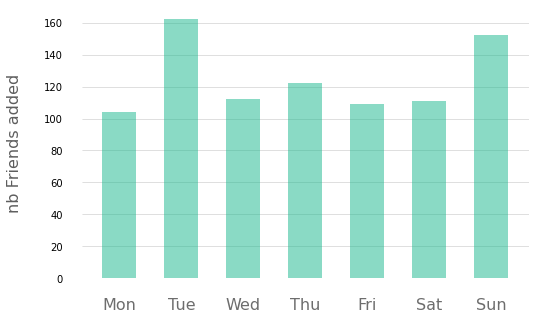

In [7]:
bar_added(full, scaled=False)

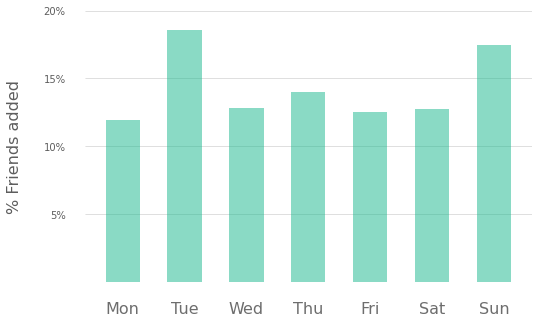

In [8]:
bar_added(full, scaled=True)

### Distinction by day of week

In [9]:
females = week_processing(df[df.female][["added"]])
females = females.assign(gender="Females")

males = week_processing(df[df.male][["added"]])
males = males.assign(gender="Males")

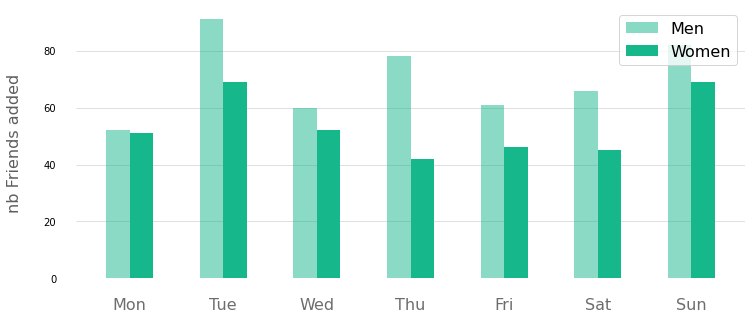

In [10]:
bar_added_gender(males, females, scaled=False)

> I have globally more male friends, so to compare male / female connections it's better to scale by gender (figure below).

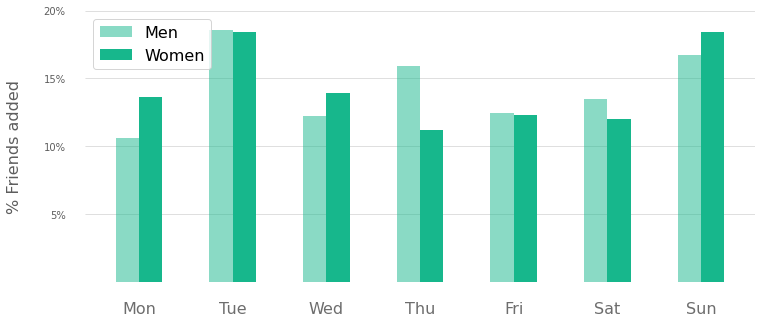

In [11]:
bar_added_gender(males, females, scaled=True)